# SETUP

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import random
from random import randint
import re
from datetime import datetime

In [3]:
#reading the datasets into a pandas dataframe
data = pd.read_csv('netflix_titles.csv')

In [4]:
#checking out the types of data each column of the dataset have
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
#chcking 30 randomized rows of the dataset
data.sample(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1767,s1768,TV Show,Dino Girl Gauko,NaN,"Naoko Matsui, Hiroshi Kamiya, Kazue Ikura, Cha...","United States, Japan","March 20, 2020",2020,TV-Y7,2 Seasons,"Anime Series, Kids' TV","When she gets angry, middle schooler Naoko tur..."
1232,s1233,Movie,Case 39,Christian Alvart,"Renée Zellweger, Jodelle Ferland, Ian McShane,...","United States, Canada","January 1, 2021",2009,R,111 min,"Horror Movies, Thrillers",A naïve social worker brings a 10-year-old chi...
2272,s2273,Movie,Free Rein: The Twelve Neighs of Christmas,Marek Losey,"Jaylen Barron, Billy Angel, Manpreet Bambra, C...",NaN,"December 7, 2018",2018,TV-G,58 min,"Children & Family Movies, Dramas","As Bright Fields preps for its Mistletoe Ball,..."
7769,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",2011,TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...
5774,s5775,Movie,Spy Kids 2: The Island of Lost Dreams,Robert Rodriguez,"Antonio Banderas, Carla Gugino, Alexa PenaVega...",United States,"March 8, 2019",2002,PG,100 min,"Children & Family Movies, Comedies",Spy kids Carmen and Juni Cortez team up with t...
4258,s4259,TV Show,Mr. Sunshine,Lee Eung-bok,"Lee Byung-hun, Kim Tae-ri, Yoo Yeon-seok, Kim ...",South Korea,"July 8, 2018",2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...",A young boy who ends up in the U.S. after the ...
3276,s3277,Movie,Kaalia,Tinnu Anand,"Amitabh Bachchan, Asha Parekh, Parveen Babi, A...",India,"December 31, 2019",1981,TV-14,173 min,"Action & Adventure, Dramas, International Movies",Jailed for robbing his brother’s unscrupulous ...
936,s937,Movie,Birdshot,Mikhail Red,"Mary Joy Apostol, Arnold Reyes, Ku Aquino, Joh...","Philippines, Qatar","March 26, 2018",2016,TV-MA,115 min,"Dramas, International Movies, Thrillers",A sheltered farm girl inadvertently shoots an ...
4697,s4698,Movie,Our Planet - Behind The Scenes,NaN,David Attenborough,United Kingdom,"August 20, 2019",2019,TV-G,63 min,Documentaries,Years spent recording footage of creatures fro...
5998,s5999,TV Show,Tayo the Little Bus,NaN,"Robyn Slade, Kami Desilets",South Korea,"July 1, 2019",2014,TV-Y,2 Seasons,"Kids' TV, Korean TV Shows",As they learn their routes around the busy cit...


# DATA CLEANING

In [6]:
#filling in the missing values of the date added column
data['date_added']=data['date_added'].fillna('January 1, {}'.format(str(data['release_year'].mode()[0])))

I had to fill in missing values of the date added column before adding the month added column, if not i'd have an error in the cell below

In [7]:
data["month_added"] = data["date_added"].apply(lambda x: x.lstrip().split(" ")[0])
#creating a new column called month_added

In [8]:
#checking the number of columns and rows in the dataset
data.shape

(7787, 13)

In [9]:
#checking the summary statistics of all the columns in the dataset including the categorical columns
data.describe(include='all')                                                                                                                     

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
count,7787,7787,7787,5398,7069,7280,7787,7787.000000,7780,7787,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769,12
top,s1600,Movie,La Bamba,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...,December
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3,833
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
#checking for missing values in the datasets
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added         0
release_year       0
rating             7
duration           0
listed_in          0
description        0
month_added        0
dtype: int64

In [11]:
#dropping the show_id column
data = data.drop("show_id", axis=1)

In [12]:
#filling in missing values in the dataset
data.country.fillna("NA", inplace=True)

data.cast.fillna("Not given", inplace=True)

data.director.fillna("Missing", inplace=True)

data.rating.fillna("Missing", inplace=True)

In [13]:
#checking if there are still missing values in the dataset
data.isnull().sum().sum()

0

In [14]:
#creating a variable called movies that contains only one data type(movies)
movies=data[data['type']=='Movie']

In [15]:
#creating a variable called movies that contains only one data type(tv_shows)
Tv_shows=data[data['type']=='Tv Show']

In [16]:
countries=data['country'].value_counts()

# DATA VISUALIZATION

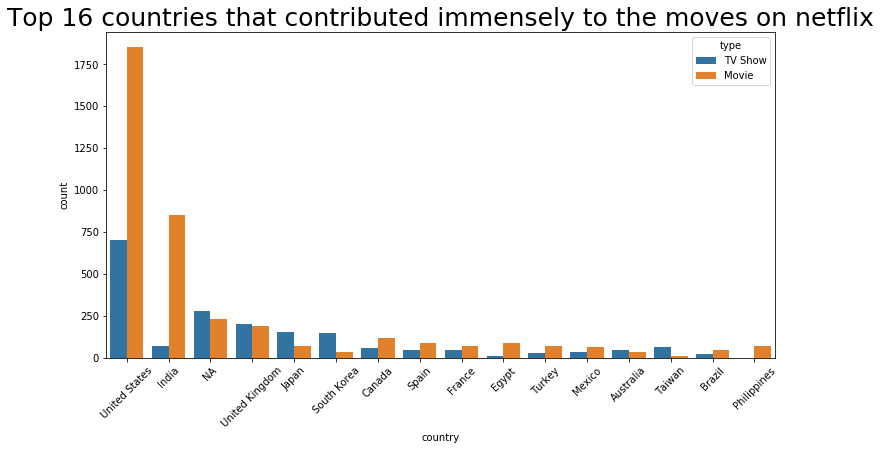

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x="country",data= data, hue= "type", order = data['country'].value_counts().index[0:16])
plt.title("Top 16 countries that contributed immensely to the moves on netflix", fontsize=25)
plt.xticks(rotation=45)
plt.show()
#Countries who Contributed immensely to the movies on netflix

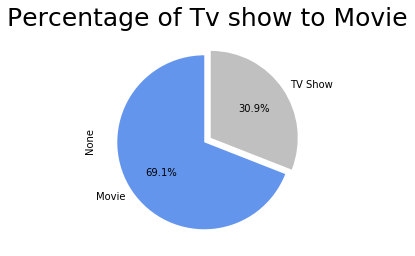

In [20]:
#using pie chart to calculate the movie type in percentage
explode=(0.045, 0.045)
colors = ( "cornflowerblue", "silver")

data.groupby('type').size().plot(kind='pie', explode=explode, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of Tv show to Movie', fontsize=25)
plt.show()

Text(0.5, 1.0, 'Ratings for movies and shows')

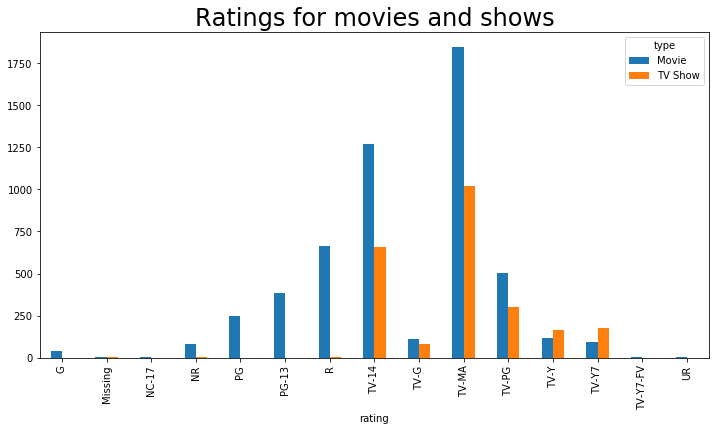

In [19]:
#checking the rating that appeared in the dataset the most
pd.crosstab(data.rating, data.type).plot(kind="bar",figsize=(12,6))
plt.title("Ratings for movies and shows", fontsize=24)

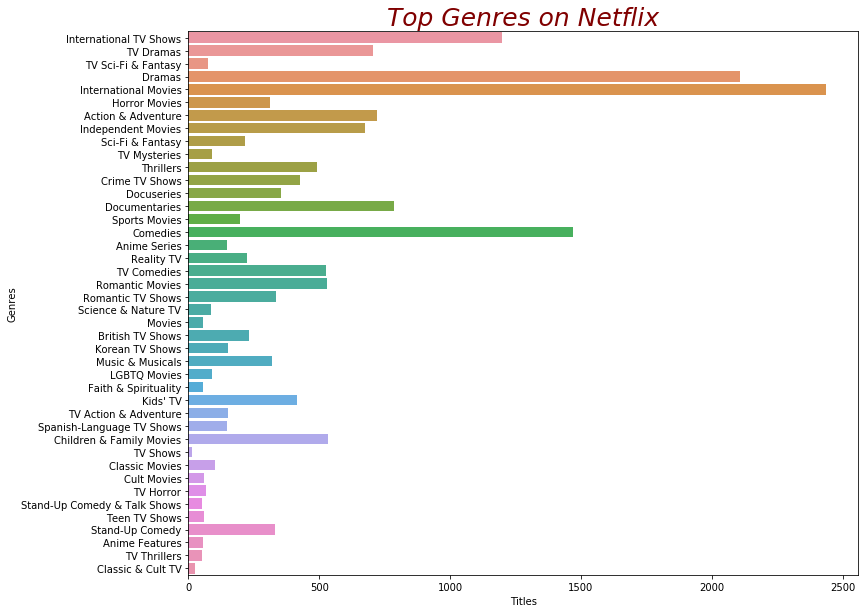

In [22]:
genre = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(12,10))
sns.countplot(y = genre)
plt.title('Top Genres on Netflix', fontsize="25", fontstyle="italic", color="maroon")
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()
#plotting the genre column according how frequent they occured on the dataset

In [23]:
months = data['month_added'].value_counts()
months
#checking the number of types each month occured in the dataset

December     833
October      785
January      767
November     738
March        669
September    619
August       618
April        601
July         600
May          543
June         542
February     472
Name: month_added, dtype: int64

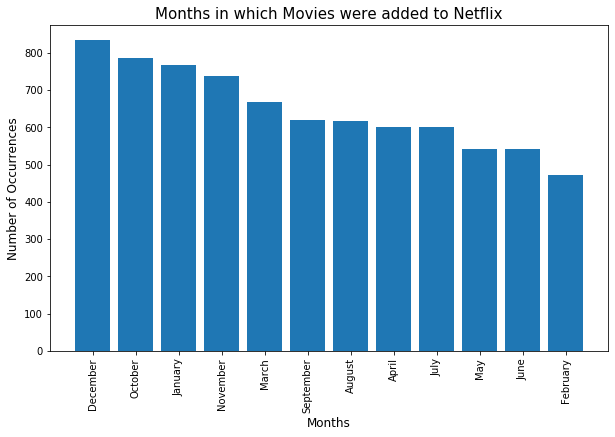

In [24]:
plt.figure(figsize=(10,6))
plt.bar(months.index, months.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Months', fontsize=12)
plt.title('Months in which Movies were added to Netflix', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()
#plotting the months column to visually see how frequent each month occured

In [27]:
#checking the country column which we filled missing earlier, to check for correlations, trends and the likes
data[data["country"]=="NA"]


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
16,TV Show,Feb-09,Missing,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NA,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",March
38,TV Show,แผนร้ายนายเจ้าเล่ห์,Missing,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NA,"March 30, 2019",2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q...",March
67,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Missing,"Oprah Winfrey, Ava DuVernay",NA,"January 26, 2017",2017,Missing,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,January
97,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NA,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,December
117,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NA,"January 5, 2019",2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...,January
...,...,...,...,...,...,...,...,...,...,...,...,...
7739,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NA,"July 10, 2020",2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin...",July
7746,TV Show,دفعة القاهرة,Missing,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NA,"April 25, 2020",2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...,April
7765,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NA,"December 13, 2019",2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ...",December
7777,TV Show,Zombie Dumb,Missing,Not given,NA,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July


In [28]:
#checking the drector column which we filled missing earlier, to check for correlations, trends and the likes
data[data["director"]=="Missing"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
0,TV Show,3%,Missing,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,August
11,TV Show,1983,Missing,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",November
16,TV Show,Feb-09,Missing,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NA,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",March
19,Movie,'89,Missing,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",May
24,TV Show,​SAINT SEIYA: Knights of the Zodiac,Missing,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,"January 23, 2020",2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,January
...,...,...,...,...,...,...,...,...,...,...,...,...
7775,TV Show,Zoids Wild,Missing,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,August
7777,TV Show,Zombie Dumb,Missing,Not given,NA,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July
7779,TV Show,Zona Rosa,Missing,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,November
7784,Movie,Zulu Man in Japan,Missing,Nasty C,NA,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",September


In [31]:
#checking the cast column which we filled missing earlier, to check for correlations, trends and the likes
data[data["cast"]=="Not given"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
12,TV Show,1994,Diego Enrique Osorno,Not given,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,May
25,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",Not given,United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,June
26,TV Show,(Un)Well,Missing,Not given,United States,"August 12, 2020",2020,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...,August
30,Movie,#cats_the_mewvie,Michael Margolis,Not given,Canada,"February 5, 2020",2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,February
35,Movie,#Rucker50,Robert McCullough Jr.,Not given,United States,"December 1, 2016",2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,December
...,...,...,...,...,...,...,...,...,...,...,...,...
7679,Movie,WWII: Report from the Aleutians,John Huston,Not given,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,March
7686,Movie,XV: Beyond the Tryline,Pierre Deschamps,Not given,United Kingdom,"March 18, 2020",2016,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",March
7766,TV Show,Zig & Sharko,Missing,Not given,France,"December 1, 2017",2016,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t...",December
7777,TV Show,Zombie Dumb,Missing,Not given,NA,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",July


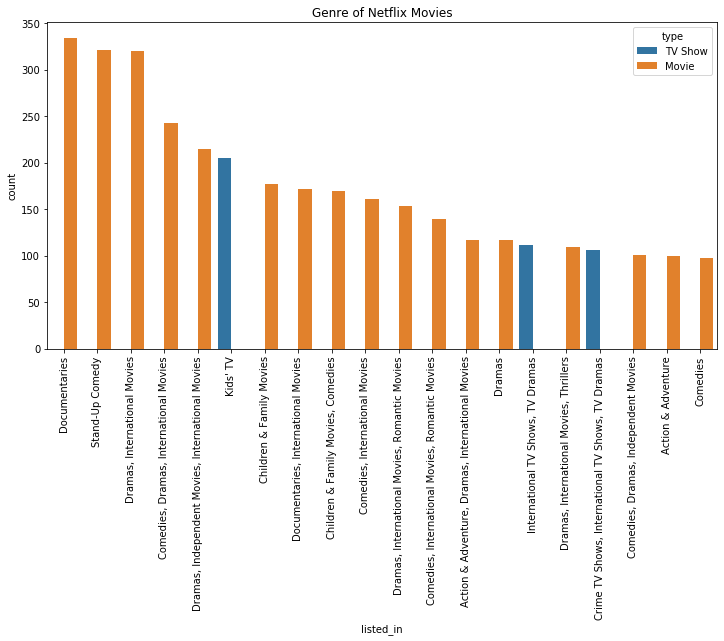

In [32]:
#plotting the genre of the movies according to how they appeared in listed_in column of the dataset according to type.
plt.figure(figsize=(12,6))
sns.countplot(x="listed_in",data= data, hue= "type", order = data['listed_in'].value_counts().index[0:20])
plt.title("Genre of Netflix Movies")
plt.xticks(rotation='vertical')
plt.show()

In [33]:
#creating a variable to contain the movies released in early times
oldest = data.sort_values("release_year", ascending = True) 
oldest[['title',"type", "release_year"]][:20]


,title,type,release_year
4867,Pioneers: First Women Filmmakers*,TV Show,1925
6117,The Battle of Midway,Movie,1942
4960,Prelude to War,Movie,1942
7679,WWII: Report from the Aleutians,Movie,1943
7342,Undercover: How to Operate Behind Enemy Lines,Movie,1943
7616,Why We Fight: The Battle of Russia,Movie,1943
7268,Tunisian Victory,Movie,1944
6699,The Negro Soldier,Movie,1944
6657,The Memphis Belle: A Story of a\nFlying Fortress,Movie,1944
5371,San Pietro,Movie,1945


In [34]:
latest = data.sort_values("release_year", ascending = False)
latest[['title', "release_year"]][:20]
#creating a variable to contain the movies released in latest times

,title,release_year
2327,Gabby's Dollhouse,2021
4468,Night Stalker: The Hunt for a Serial Killer,2021
2753,History of Swear Words,2021
5103,Ratones Paranoicos: The Band that Rocked Argen...,2021
1355,Chris Rock Total Blackout: The Tamborine Exten...,2021
7644,Wish You,2021
1864,Dream Home Makeover,2021
6701,The Netflix Afterparty,2021
6670,The Minimalists: Less Is Now,2021
1222,Carmen Sandiego,2021


In [35]:
movies_2021 =data[data['release_year']==2021]
movies_2021
#creating a variable for 2021 movies

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
980,TV Show,Bling Empire,Missing,Not given,NA,"January 15, 2021",2021,TV-MA,1 Season,Reality TV,Follow LA's wildly wealthy Asian and Asian Ame...,January
1222,TV Show,Carmen Sandiego,Missing,"Gina Rodriguez, Finn Wolfhard, Abby Trott, Mic...",United States,"January 15, 2021",2021,TV-Y7,4 Seasons,"Kids' TV, TV Thrillers","A master thief who uses her skills for good, C...",January
1285,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands","January 8, 2021",2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri...",January
1355,Movie,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock,Chris Rock,NA,"January 12, 2021",2021,TV-MA,98 min,Stand-Up Comedy,"In this extended cut of his 2018 special, Chri...",January
1440,TV Show,Cobra Kai,Missing,"Ralph Macchio, William Zabka, Xolo Maridueña, ...",United States,"January 1, 2021",2021,TV-14,3 Seasons,"TV Action & Adventure, TV Dramas",Decades after the tournament that changed thei...,January
1514,Movie,"Crack: Cocaine, Corruption & Conspiracy",Stanley Nelson,Not given,United States,"January 11, 2021",2021,TV-MA,90 min,Documentaries,"A cheap, powerful drug emerges during a recess...",January
1528,Movie,Creating The Queen's Gambit,Missing,Not given,NA,"January 8, 2021",2021,TV-14,14 min,Documentaries,A fascinating character. Exquisite sets. A wig...,January
1780,TV Show,Disenchantment,Missing,"Abbi Jacobson, Eric André, Nat Faxon, John DiM...",United States,"January 15, 2021",2021,TV-14,3 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","Princess duties call, but she'd rather be drin...",January
1864,TV Show,Dream Home Makeover,Missing,Not given,United States,"January 1, 2021",2021,TV-G,2 Seasons,Reality TV,Dreams come true for real families looking for...,January
2327,TV Show,Gabby's Dollhouse,Missing,"Laila Lockhart Kraner, Tucker Chandler, Juliet...",NA,"January 5, 2021",2021,TV-Y,1 Season,Kids' TV,"Cute cats, quirky crafts and colorful magic! J...",January


Text(0.5, 1.0, 'Ratings of 2021 Movies')

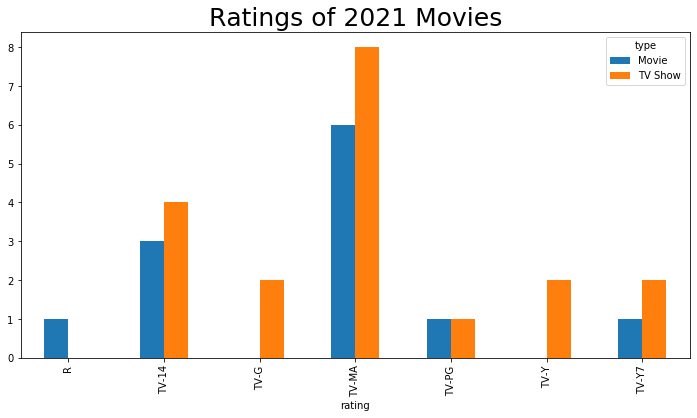

In [36]:
pd.crosstab(movies_2021.rating, movies_2021.type).plot(kind="bar",figsize=(12,6))
plt.title("Ratings of 2021 Movies", fontsize=25)
#visualizing the rating of 2021 movies

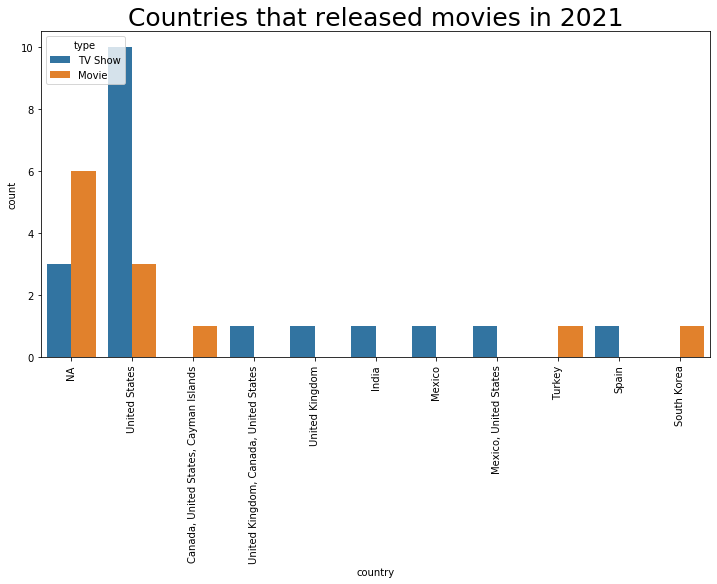

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x="country",data= movies_2021, hue= "type")
plt.title("Countries that released movies in 2021", fontsize=25)
plt.xticks(rotation=90)
plt.show()
#checkng countries that contributed to movie release in 2021

In [23]:
standup=data[data["listed_in"] == "Stand-Up Comedy"]
standup[["title","country","type","release_year"]].sample(30)
#creating a variable for the standup shows in the dataset

,title,country,type,release_year
3137,Jeff Dunham: Minding the Monsters,United States,Movie,2012
7656,Wonho Chung: Live in New York,NA,Movie,2014
649,Aziz Ansari: Buried Alive,United States,Movie,2013
3136,Jeff Dunham: Controlled Chaos,United States,Movie,2011
1602,Daniel Sosa: Sosafado,Mexico,Movie,2017
3135,Jeff Dunham: Beside Himself,United States,Movie,2019
4005,Mea Culpa,Mexico,Movie,2017
7125,Todd Glass: Stand-Up Special,United States,Movie,2012
3341,Kevin Hart: I'm a Grown Little Man,United States,Movie,2009
5270,"Ron White: If You Quit Listening, I'll Shut Up",United States,Movie,2018


In [25]:
standupless=standup[standup["release_year"]<=2000]
standupless
#checking if standup shows were released before 2000

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
919,Movie,Bill Hicks: One Night Stand,John Fortenberry,Bill Hicks,United Kingdom,"December 31, 2018",1991,TV-MA,28 min,Stand-Up Comedy,Bill Hicks remembers a wild night in 1989 and ...,December
921,Movie,Bill Hicks: Relentless,Chris Bould,Bill Hicks,United Kingdom,"December 31, 2018",1992,TV-MA,61 min,Stand-Up Comedy,"In one of his most iconic performances, late c...",December
922,Movie,Bill Hicks: Revelations,Chris Bould,Bill Hicks,United Kingdom,"December 31, 2018",1993,TV-MA,56 min,Stand-Up Comedy,"In his final recorded special, the iconoclasti...",December
923,Movie,Bill Hicks: Sane Man,"Kevin Booth, David Johndrow",Bill Hicks,United States,"December 31, 2018",1989,TV-MA,81 min,Stand-Up Comedy,Filmed in 1989 at a turning point in comedian ...,December
1702,Movie,Denis Leary: No Cure For Cancer,Ted Demme,Denis Leary,United States,"August 8, 2017",1992,R,62 min,Stand-Up Comedy,In the stand-up performance that made him a le...,August
1918,Movie,Eddie Murphy: Delirious,Bruce Gowers,Eddie Murphy,United States,"April 15, 2018",1983,TV-MA,69 min,Stand-Up Comedy,Flashing the wild stand-up comedy that made hi...,April
1919,Movie,Eddie Murphy: Raw,Robert Townsend,Eddie Murphy,United States,"January 1, 2021",1987,R,90 min,Stand-Up Comedy,This stand-up comedy classic features Eddie Mu...,January
3156,Movie,Jerry Seinfeld: I'm Telling You for the Last Time,Marty Callner,Jerry Seinfeld,United States,"January 30, 2018",1998,TV-14,69 min,Stand-Up Comedy,"Months after his classic TV sitcom ends, the l...",January
5200,Movie,Richard Pryor: Live in Concert,Jeff Margolis,Richard Pryor,United States,"December 1, 2016",1979,TV-MA,79 min,Stand-Up Comedy,Richard Pryor's classic 1979 concert film has ...,December
5357,Movie,Sam Kinison: Breaking the Rules,Walter C. Miller,Sam Kinison,United States,"December 31, 2018",1987,TV-MA,50 min,Stand-Up Comedy,The one-time preacher shakes and shudders as h...,December


All standup comedies released 2000 and below were all movies and the highest duration was 111 mins

In [41]:
documentaries[documentaries["release_year"]<=2000]
#checking for documentaries that were released before or in 2000

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added
623,Movie,Auschwitz: Blueprints of Genocide,Mike Rossiter,Roy Marsden,United Kingdom,"January 19, 2019",1994,TV-PG,49 min,Documentaries,Newly released KGB files expose evidence provi...,January
1333,Movie,Children of God,John Smithson,Not given,United Kingdom,"August 1, 2016",1994,TV-MA,63 min,Documentaries,A former member examines the lingering effects...,August
7616,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",Not given,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,March
7679,Movie,WWII: Report from the Aleutians,John Huston,Not given,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,March


Just 4 Documentaries on netflix were released before 2000 and 3 of them belongs to TV-PG(Parental guidance) Rating